# EXEMPLO DE CLASSIFICAÇÃO

# MNIST: base de dados com 70.000 imagens de numerais escritos por estudantes e trabalhadores nos US. Cada imagem com 784 atributos, ou seja, com representação de 28x28 pixels

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)



In [2]:
import numpy as np
mnist.target = mnist.target.astype(np.int8) 
print (mnist.target)


[5 0 4 ... 4 5 6]


# Lembrando que o Scikit-learn armazena os dataset na pasta chamada $HOME/scikit_learn_data¶

In [3]:
X, y = mnist["data"], mnist["target"]
print (X.shape, y.shape)

(70000, 784) (70000,)


# Vamos visualizar uma imagem

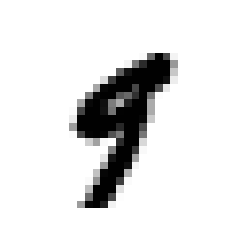

In [4]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Confirmando com Label...

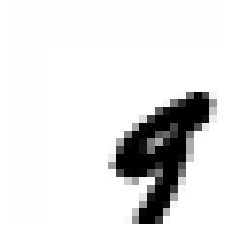

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
shifted_digit_image=shift(some_digit_image, [5,5], cval=1)
plt.imshow(shifted_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()



In [6]:
y[36000]

9

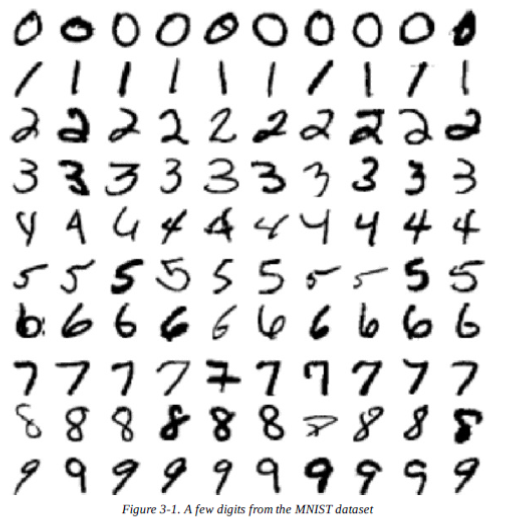

# Each pixel with distinct intensity: 0 to 255 (black)

# #Separando treino e teste. Treino com 60000 e teste com 10000.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Vamos agora embaralhar para garantir similaridade. (Embora no caso do fetch_openml isso nao seja necessário)

# Alguns algoritmos são sensíveis à ordem das instâncias do treino, perdendo em qualidade quando instâncias parecidas estão próximas.

In [8]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
shuffle_index

array([29965, 34313, 48752, ..., 17104, 45689, 19261])

# Ainda, vamos nesse primeiro momento focar em um problema binário. OU seja, dado um número qualquer decidir se é ou não um numero 5 (por exemplo)

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42) #Criando o objeto do algoritmo
forest.fit(X_train, y_train_5) # realizando o treinamento


RandomForestClassifier(random_state=42)

In [12]:
resultado = forest.predict(X_test) # realização a predição ou inferência.


In [13]:
resultado

array([False, False, False, ..., False,  True, False])

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test_5, resultado)

0.9326177698270721

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test_5, resultado)

array([[9105,    3],
       [ 110,  782]])